<a href="https://colab.research.google.com/github/Le4o/topicos-avancados-ic/blob/main/reducao_de_dimensionalidade_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redução de Dimensionalidade
#### Exercício da matéria de Tópicos Avançados em Inteligência Computacional

Grupo:
- João Victor de Sledz Bulhões
- Leonardo de Andrade Santana
- Lis da Silva Azevedo

### Definição do Exercício

CIFAR10 é dataset de 50.000 imagens coloridas de treinamento com resolução de 32x32 e 10.000 imagens de teste, rotuladas em 10 categorias.

Agora, a partir dos conhecimentos adquiridos até o momento, realizem a redução de dimensionalidade do dataset CIFAR10, comparando as técnicas e seus resultados. Após a redução, implementem uma rede neural para a classificação utilizando cada conjunto de dados(Normal, PCA, AE e VAE).

Como sempre, escrevam com capricho o trabalho, apresentem a análise exploratória, fundamentação, metodologia, resultados, discussões e conclusões, avaliando qualitativa e quantitativamente o desempenho do modelo gerado, utilizando todos os conceitos e métodos até aqui aprendidos.

Referência: https://keras.io/api/datasets/cifar10/

In [29]:
import tensorflow as tf
import matplotlib.pyplot as plt

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print('Número de imagens:', len(x_train))
print('Número de Imagens de teste:', len(x_test))

Número de imagens: 50000
Número de Imagens de teste: 10000


Exemplo de uma imagem de cachorro
Título (dog): [5]


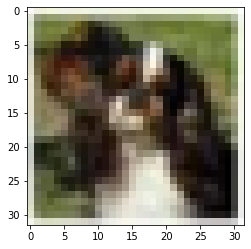

In [23]:
print('Exemplo de uma imagem de cachorro')
print('Título (dog):', y_train[500])
plt.imshow(x_train[500])

### PCA
Utilizando o `Principal Components Analysis (PCA)`.

In [32]:
from sklearn.decomposition import PCA

n_components = 4
components_columns = ['C%d' % i for i in range(1, n_components+1)]

pca = PCA(n_components=n_components)
components = pca.fit_transform(x_train)
components 

ValueError: ignored